In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from datetime import datetime
import pytz

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 32296.9590 - val_loss: 30896.1348
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30167.9746 - val_loss: 25373.5391
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22569.9473 - val_loss: 11553.9053
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8155.7427 - val_loss: 655.8539
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 684.5505 - val_loss: 540.4825
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 428.1788 - val_loss: 446.9399
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 407.8093 - val_loss: 598.8722
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 426.2116 - val_loss: 446.5469
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 409.0399 - val_loss: 656.7454
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 412.9178 - val_loss: 544.1473
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 393.3504 - val_loss: 455.9599
Epoch 12/50
77/77

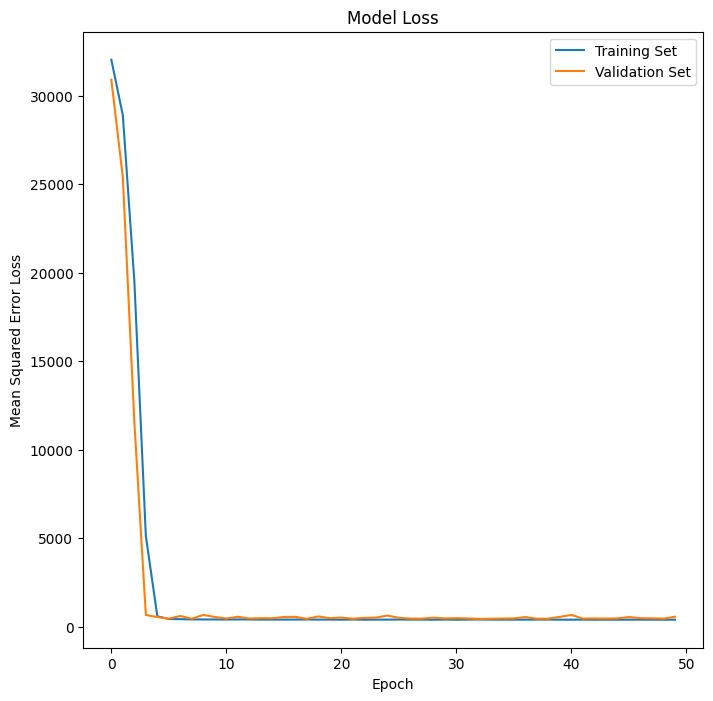

In [2]:
# DNN-30-16-8-4 Model without optimizer
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 27259.8223 - val_loss: 96078.5391
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22079.5098 - val_loss: 4037.6799
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19778.9824 - val_loss: 13318.6865
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12722.8369 - val_loss: 4750.2437
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13505.9580 - val_loss: 14090.5098
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15914.0215 - val_loss: 11536.0488
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12816.2031 - val_loss: 8617.1719
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17393.5469 - val_loss: 5580.4795
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8452.1973 - val_loss: 7809.2466
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11421.6260 - val_loss: 7201.4829
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14213.6943 - val_loss: 41932.5117
Epoc

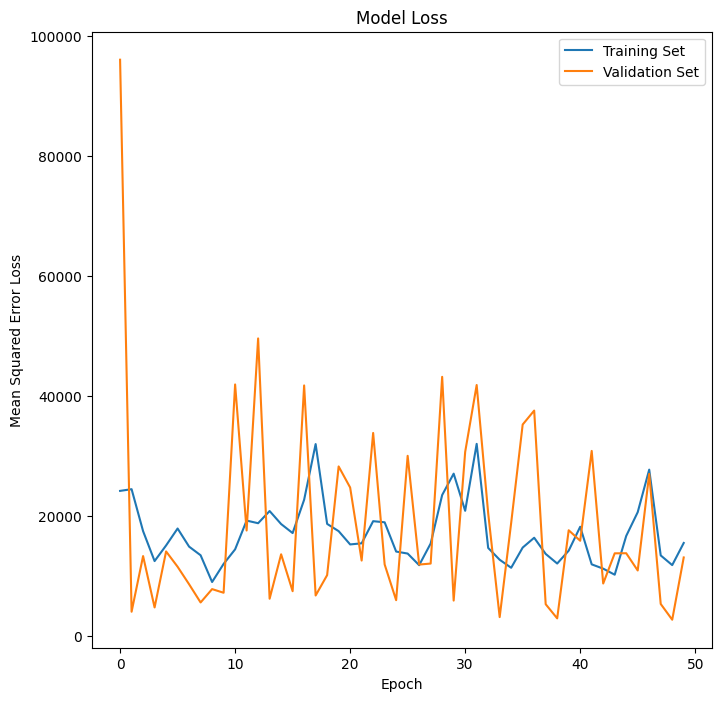

In [5]:
# DNN-30-16-8-4 Model with SGD optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.1, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12934.6514 - val_loss: 764.0330
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 668.9969 - val_loss: 543.9724
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 564.0292 - val_loss: 658.9096
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 574.4641 - val_loss: 784.6185
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 595.2364 - val_loss: 559.1234
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 533.3246 - val_loss: 1548.2296
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1005.8589 - val_loss: 770.1603
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 634.2311 - val_loss: 462.7290
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 517.8930 - val_loss: 516.5814
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 727.1898 - val_loss: 508.3268
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 606.7161 - val_loss: 567.6377
Epoch 12/50
77/77 ━━━━━━━━

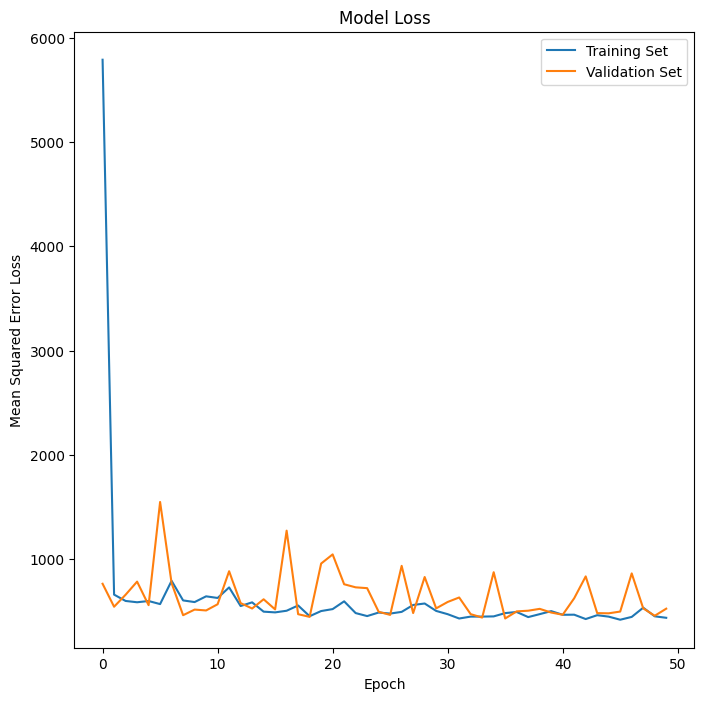

In [4]:
# DNN-30-16-8-4 Model with Adam optimizer and LR of 0.1
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 24344.2090 - val_loss: 2377.2939
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1446.1346 - val_loss: 1976.5936
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 962.8917 - val_loss: 1675.5399
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 880.0939 - val_loss: 867.8963
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 778.8012 - val_loss: 725.4084
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 895.1492 - val_loss: 1466.4656
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 798.2727 - val_loss: 1994.8364
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 753.9055 - val_loss: 699.1571
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 795.7202 - val_loss: 733.3372
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 739.0258 - val_loss: 677.7108
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 688.3937 - val_loss: 706.6324
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━

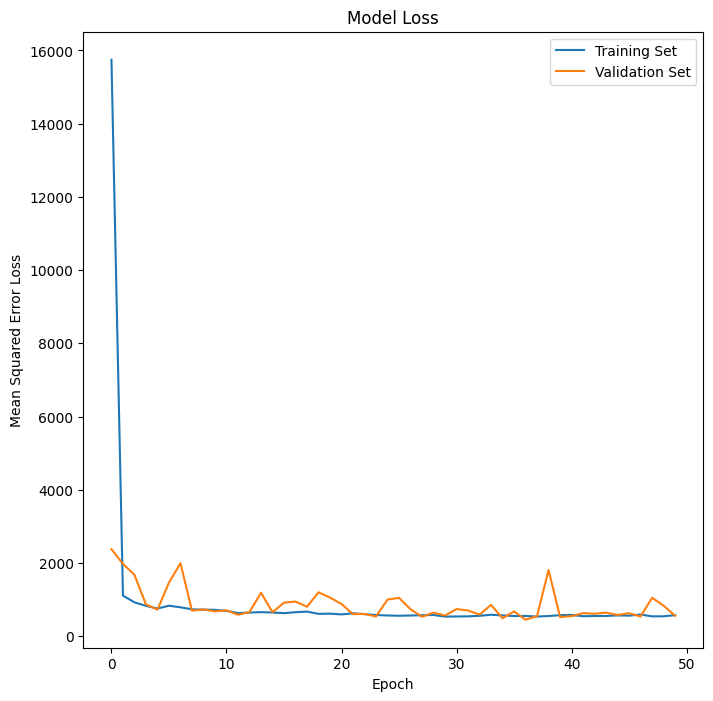

In [6]:
# DNN-30-16-8-4 Model with SGD optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 22019.8867 - val_loss: 667.1774
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 556.0267 - val_loss: 505.4340
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 494.6022 - val_loss: 458.0104
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 464.6574 - val_loss: 542.7498
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 479.2368 - val_loss: 552.4620
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 571.1017 - val_loss: 517.3694
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 525.4951 - val_loss: 577.1858
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 510.9517 - val_loss: 823.7523
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 467.3822 - val_loss: 591.6801
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 482.1469 - val_loss: 448.9714
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 459.7195 - val_loss: 502.4792
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 

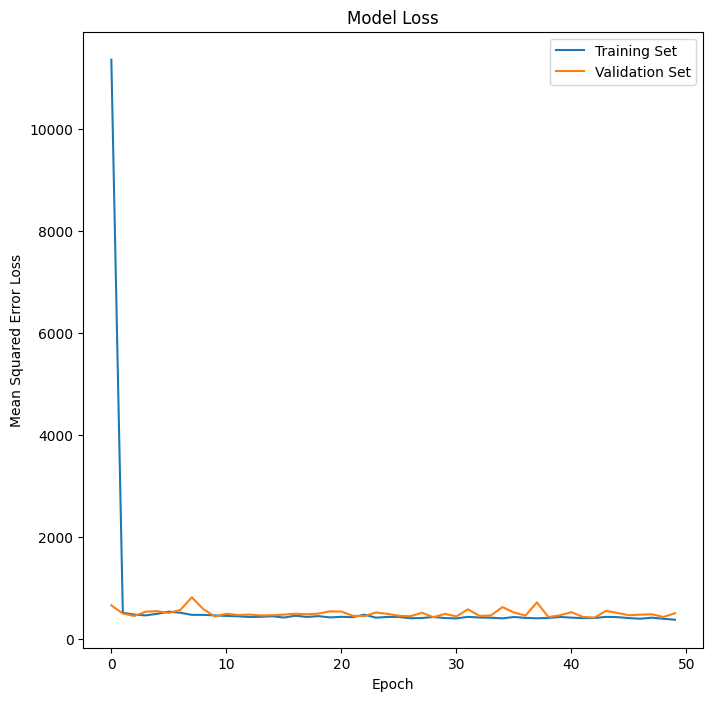

In [5]:
# DNN-30-16-8-4 Model with Adam optimizer and LR of 0.01
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32364.9688 - val_loss: 31350.6777
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30839.7949 - val_loss: 27531.4199
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25525.0312 - val_loss: 17637.4688
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15200.9658 - val_loss: 4807.3599
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5531.3179 - val_loss: 928.7103
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2455.2449 - val_loss: 554.9485
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1052.9298 - val_loss: 527.5135
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 779.2860 - val_loss: 472.0920
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 423.1931 - val_loss: 491.7173
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 420.2584 - val_loss: 511.7978
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 397.2340 - val_loss: 479.5892
Epoch 12/50
77/77 ━━━━━

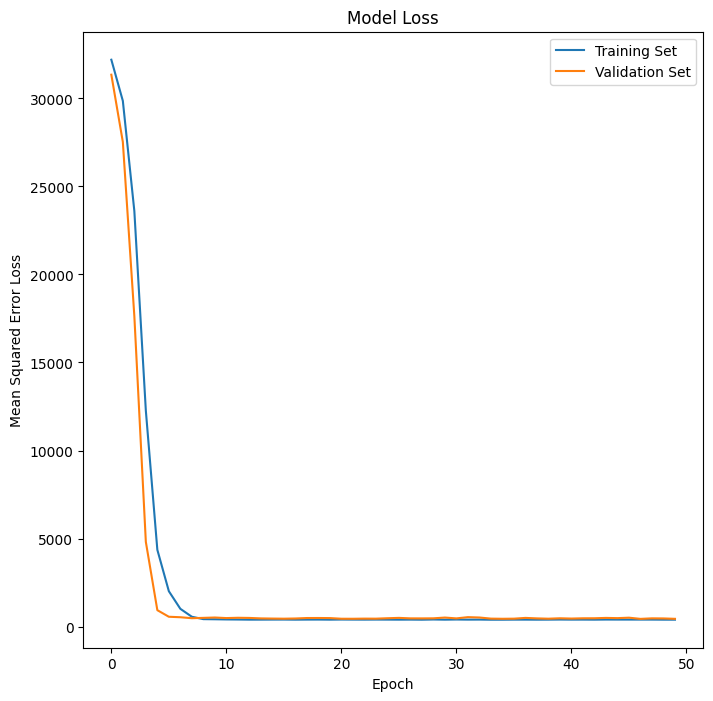

In [7]:
# DNN-30-16-8-4 Model with SGD optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 32410.6172 - val_loss: 31183.9805
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29989.7266 - val_loss: 21583.0156
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14780.5801 - val_loss: 620.6411
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 526.6750 - val_loss: 518.9474
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 431.5287 - val_loss: 466.9945
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 396.4600 - val_loss: 477.0544
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 381.4286 - val_loss: 459.9211
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 400.5522 - val_loss: 448.7453
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 374.8192 - val_loss: 476.7745
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 408.4046 - val_loss: 418.6140
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 391.3910 - val_loss: 447.0412
Epoch 12/50
77/77 ━━━━━━━━━━━━━

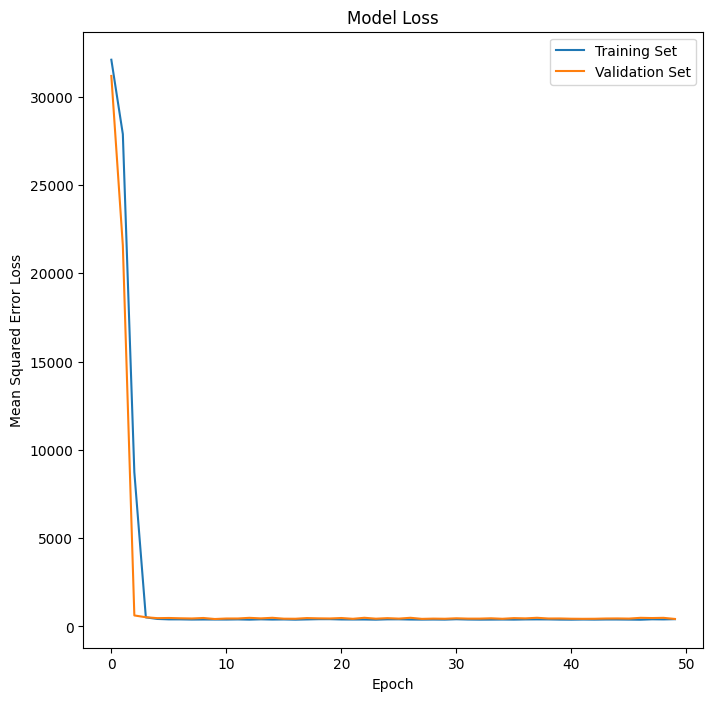

In [6]:
# DNN-30-16-8-4 Model with Adam optimizer and LR of 0.001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 32863.6953 - val_loss: 32497.4258
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32798.7617 - val_loss: 32439.9961
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32506.8301 - val_loss: 32378.6133
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32306.0605 - val_loss: 32311.1309
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32359.3945 - val_loss: 32236.4648
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32382.7930 - val_loss: 32151.6328
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32274.2969 - val_loss: 32052.4922
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32225.5547 - val_loss: 31940.9805
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31819.6738 - val_loss: 31812.0859
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32043.9473 - val_loss: 31661.1055
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31621.3164 - val_los

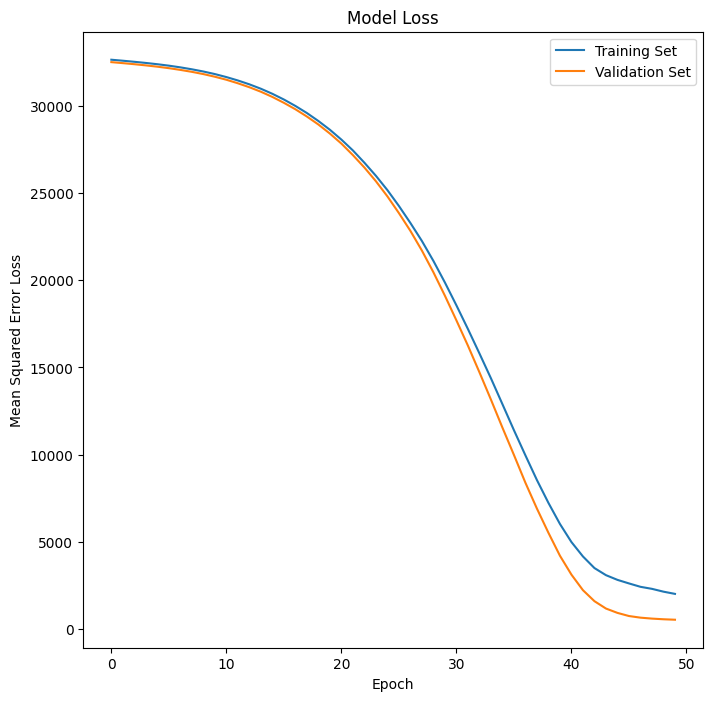

In [8]:
# DNN-30-16-8-4 Model with SGD optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.0001, clipvalue=1.0))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 32171.3574 - val_loss: 32546.9238
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32746.8320 - val_loss: 32470.4844
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32326.5820 - val_loss: 32386.4023
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32134.4355 - val_loss: 32288.6172
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32456.4102 - val_loss: 32172.2656
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32082.6152 - val_loss: 32026.5547
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32121.8105 - val_loss: 31847.6855
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31591.2363 - val_loss: 31613.9082
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31345.9727 - val_loss: 31333.1016
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31195.3262 - val_loss: 30975.6660
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30767.2129 - val_loss: 30523.03

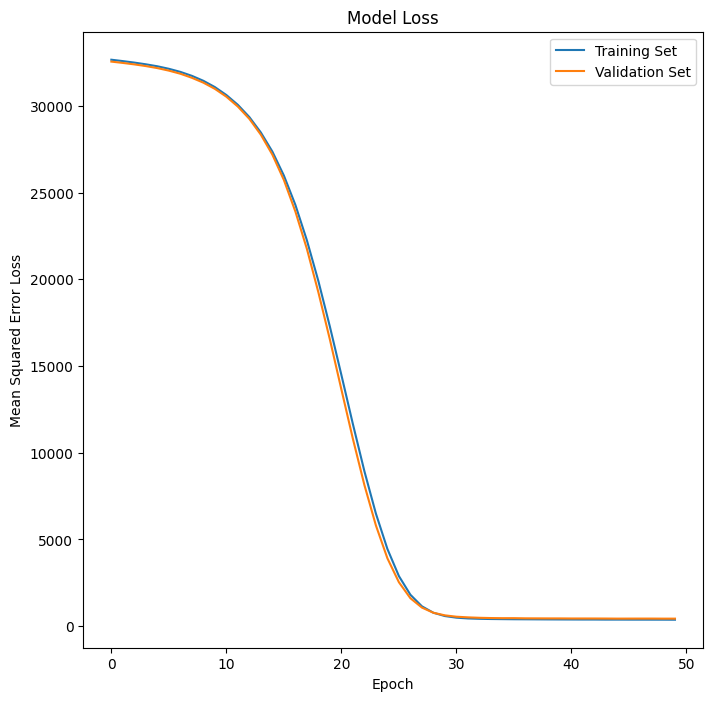

In [7]:
# DNN-30-16-8-4 Model with Adam optimizer and LR of 0.0001
def load_data(train_file, validation_file, test_file):
    train_data = pd.read_csv(train_file)
    validation_data = pd.read_csv(validation_file)
    test_data = pd.read_csv(test_file)
    return train_data, validation_data, test_data

def prepare_data(data):
    X = data.drop('TARGET_deathRate', axis=1)
    y = data['TARGET_deathRate']
    return X, y

def train_model(X_train, y_train):
    # Creating the DNN model
    model = Sequential()
    model.add(Dense(30, input_dim=X_train.shape[1]))  # First hidden layer with 30 units
    model.add(Dense(16))  # Second hidden layer with 16 units
    model.add(Dense(8))  # Third hidden layer with 8 units
    model.add(Dense(4))  # Fourth hidden layer with 4 units
    model.add(Dense(1))  # Output layer for regression

    # Compiling the model
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_validation, y_validation))
    return model, history


def test_model(model, X_test, y_test):
    test_loss = model.evaluate(X_test, y_test)
    print(f'Test Loss: {test_loss:.2f}')

    # Predicting the test set
    y_test_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Mean Squared Error: {mse:.2f}")
    print(f"Test R-squared: {r2:.2f}")

    # Printing Timestamp
    local_tz = pytz.timezone('America/New_York')
    utc_now = datetime.now(pytz.utc)
    local_time = utc_now.astimezone(local_tz)
    print("Local Date and Time:", local_time.strftime("%Y-%m-%d %H:%M:%S"))


train_file = 'train_cancer_reg.csv'
validation_file = 'validation_cancer_reg.csv'
test_file = 'test_cancer_reg.csv'

train_data, validation_data, test_data = load_data(train_file, validation_file, test_file)

# Preparing data
X_train, y_train = prepare_data(train_data)
X_validation, y_validation = prepare_data(validation_data)
X_test, y_test = prepare_data(test_data)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

# Training model
model, history = train_model(X_train, y_train)

# Testing model on test set
test_model(model, X_test, y_test)

# Plotting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(train_loss))

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, train_loss, label='Training Set')
plt.plot(epochs_range, val_loss, label='Validation Set')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()